In [10]:
import sys
sys.path.append('/home/painchess/clean_merger_rate')
from simulation import *
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import csv
import os


In [11]:
params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
plt.rcParams["figure.dpi"]= 150
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(params)

# Make Bolshoi MAH 

In [13]:
def bolshoi_read_mtree(path, files):
    dep_first_ids, last_mainleaf, ids, masses, scale_f, mvir_all= [], [], [], [], [], []
    dep, lmf, idx, mss, a, mall = [], [], [], [], [], []
    for file in files:
        with open(path + file, 'r') as f:
            lines = csv.reader(f, delimiter =' ', skipinitialspace=True)
            for i in range(48):
                next(lines)
            for line in lines:
                try:
                    if line[0] != '#tree':
                        dep.append(int(line[28]))
                        lmf.append(int(line[34]))
                        idx.append(int(line[1]))
                        mss.append(float(line[10]))
                        a.append(float(line[0]))
                        mall.append(float(line[38]))
                    else:
                        dep_first_ids.append(dep)
                        last_mainleaf.append(lmf)
                        ids.append(idx)
                        scale_f.append(a)
                        masses.append(mss)
                        mvir_all.append(mall)
                        dep = []
                        lmf = []
                        ids = []
                        mss = []
                        a = []
                        mall = []
                except IndexError:
                        print(line)
    return dep_first_ids, last_mainleaf, ids, masses, scale_f, mvir_all

def make_bolshoi_mah(path, files):
    sorted_ids, sorted_mlf, mah, scale_fs= [], [], [], []
    dep_first_ids, last_mainleaf, ids, masses, scale_f, mvir_all = bolshoi_read_mtree(path, files)
    for i in range(len(dep_first_ids)):
        tree = np.array(dep_first_ids[i])
        mlf = np.array(last_mainleaf[i])
        mass = np.array(masses[i])
        scale = np.array(scale_f[i])
        assortiment = np.argsort(tree)
        sorted_ids.append(tree[assortiment])
        sorted_mlf.append(mlf[assortiment])
        n_main = len(np.where(mlf[assortiment]==mlf[assortiment][0])[0]) 
        mah.append(mass[assortiment][:n_main])
        scale_fs.append(scale[assortiment][:n_main])
    return np.array(mah, dtype=object), np.array(scale_fs, dtype=object)
    

In [14]:
bolshoi_folder = './bolshoi_trees/'
files = os.listdir(bolshoi_folder)
mah, a =  make_bolshoi_mah(bolshoi_folder, files)

Text(0.5, 1.0, 'Bolshoi mah test')

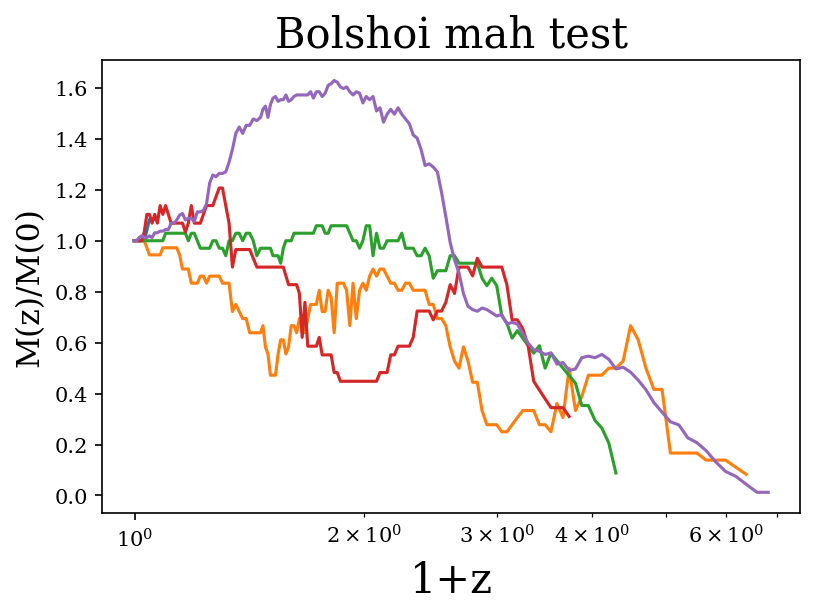

In [25]:
for i in range(5):
    n = np.random.randint(len(mah))
    plt.plot(1/a[n], mah[n]/mah[n][0])
plt.xscale('log')
plt.xlabel('1+z', size=20)
plt.ylabel(r'M(z)/M(0)', size=15)
plt.title('Bolshoi mah test', size=20)

# Get Bolshoi MAH 

In [3]:
path = '/home/painchess/YubaHDD6T/oldsims/'
sim1 = Simulation('Bolshoi', 0.27, 0.81, path)
rd = sim1.get_redshifts()
mah = sim1.get_mah()

Text(0.5, 1.0, 'Bolshoi mah test')

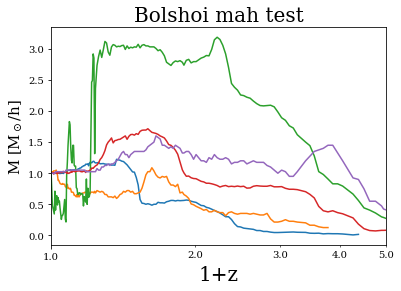

In [9]:
for i in range(5):
    n = np.random.randint(len(mah))
    mh = mah[n]
    plt.plot(1+rd[:len(mh)], mh/mh[0])
ax = plt.gca()
plt.xscale('log')
ax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.xlim(1,5)
plt.xlabel('1+z', size=20)
plt.ylabel(r'M [M$_\odot$/h]', size=15)

plt.title('Bolshoi mah test', size=20)